tuning factors : 

img_size, 
CNN architechture, 
validation_set, 
neuron size, 
activation functions.

things to do

2) train with validation set.
3) then fine-tune the model. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras import layers,models
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_size = 224

In [3]:
path='Downloads/archive/train/'
trcrimg = os.listdir(path+'Positive/')
print("Number of Crack Images: ", len(trcrimg))
trnocrimg = os.listdir(path+'Negative/')
print("Number of No Crack Images: ", len(trnocrimg))

Number of Crack Images:  300
Number of No Crack Images:  300


In [4]:
labels = ['Negative', 'Positive']
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train_set = read_images('Downloads/archive/train/')


Text(0.5, 1.0, 'Number of Images')

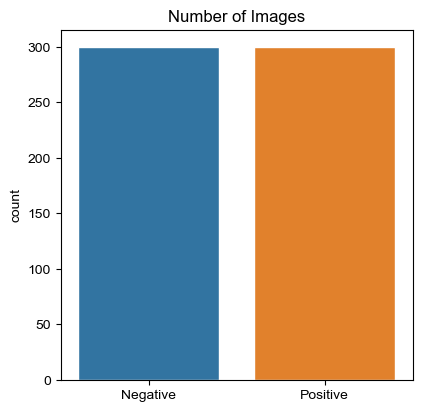

In [5]:
Im = []
for i in train_set:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

In [6]:
x = []
y = []
for feature, label in train_set:
    x.append(feature)
    y.append(label)
x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)
print(x)
print(y)

[[[[0.00392157]
   [0.00784314]
   [0.10980392]
   ...
   [0.67058824]
   [0.67058824]
   [0.74509804]]

  [[0.03137255]
   [0.0627451 ]
   [0.26666667]
   ...
   [0.61960784]
   [0.61176471]
   [0.65882353]]

  [[0.        ]
   [0.16078431]
   [0.46666667]
   ...
   [0.66666667]
   [0.60392157]
   [0.56470588]]

  ...

  [[0.74509804]
   [0.71372549]
   [0.69019608]
   ...
   [0.51372549]
   [0.48235294]
   [0.53333333]]

  [[0.76862745]
   [0.70980392]
   [0.66666667]
   ...
   [0.63529412]
   [0.48627451]
   [0.46666667]]

  [[0.74509804]
   [0.69019608]
   [0.6627451 ]
   ...
   [0.71372549]
   [0.54509804]
   [0.50588235]]]


 [[[0.70196078]
   [0.50980392]
   [0.52941176]
   ...
   [0.78431373]
   [0.75294118]
   [0.72156863]]

  [[0.75686275]
   [0.70588235]
   [0.65882353]
   ...
   [0.69411765]
   [0.69803922]
   [0.70196078]]

  [[0.81176471]
   [0.93333333]
   [0.88627451]
   ...
   [0.61960784]
   [0.64313725]
   [0.67058824]]

  ...

  [[0.6       ]
   [0.63921569]
   [0.6

In [7]:
labels = ['Negative', 'Positive']
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

test_set = read_images('Downloads/archive/test/')

x_test = []
y_test = []
for feature, label in test_set:
    x_test.append(feature)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
x_test = x_test / 255
y_test = np.array(y_test)

In [8]:
labels = ['Negative', 'Positive']
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

valid_set = read_images('Downloads/archive/valid/')
x_valid = []
y_valid = []
for feature, label in valid_set:
    x_valid.append(feature)
    y_valid.append(label)
x_valid = np.array(x_valid).reshape(-1, img_size, img_size, 1)
x_valid = x_valid / 255
y_valid = np.array(y_valid)
print(x_valid)
print(y_valid)

[[[[0.56862745]
   [0.5372549 ]
   [0.54509804]
   ...
   [0.52941176]
   [0.58431373]
   [0.6       ]]

  [[0.6627451 ]
   [0.61960784]
   [0.61960784]
   ...
   [0.45882353]
   [0.55686275]
   [0.56078431]]

  [[0.68627451]
   [0.66666667]
   [0.68627451]
   ...
   [0.40392157]
   [0.45882353]
   [0.47843137]]

  ...

  [[0.50588235]
   [0.54117647]
   [0.56470588]
   ...
   [0.57254902]
   [0.58431373]
   [0.57254902]]

  [[0.54117647]
   [0.56862745]
   [0.58431373]
   ...
   [0.57647059]
   [0.58039216]
   [0.56862745]]

  [[0.57647059]
   [0.58431373]
   [0.58431373]
   ...
   [0.58431373]
   [0.59215686]
   [0.58431373]]]


 [[[0.42745098]
   [0.49411765]
   [0.42745098]
   ...
   [0.57254902]
   [0.60392157]
   [0.57254902]]

  [[0.57254902]
   [0.43529412]
   [0.52156863]
   ...
   [0.51764706]
   [0.60784314]
   [0.52941176]]

  [[0.58431373]
   [0.54901961]
   [0.61568627]
   ...
   [0.4627451 ]
   [0.63137255]
   [0.55686275]]

  ...

  [[0.39607843]
   [0.46666667]
   [0.5

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape= x.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2))
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x, y, epochs = 50,validation_data = (x_valid, y_valid), verbose=1)
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(x_test)
predictions=np.argmax(predictions,axis=1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Negative','Positive']))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 373248)            0         
                                                                 
 dense_4 (Dense)             (None, 2)                